# **1. Unzip the Archive and Access Files:**

In [5]:
import zipfile
import os

# Path to the uploaded zip file
zip_file_path = '/content/archive.zip'

# Extraction path
extract_path = '/content/planesnet_dataset'

# Unzip the uploaded file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Path to planesnet.json file
json_file_path = os.path.join(extract_path, 'planesnet', 'planesnet.json')

# Path to the folder containing PNG images
image_folder_path = os.path.join(extract_path, 'planesnet', 'planesnet')

# **2. Load JSON Data:**

In [6]:
import json

# Path to planesnet.json file
json_file_path = '/content/planesnet_dataset/planesnet.json'

# Load JSON data
with open(json_file_path, 'r') as json_file:
    data = json.load(json_file)

# Extract data and labels
data_list = data['data']
labels = data['labels']

# Rest of your data processing code...


# **3. Access PNG Images (Example):**

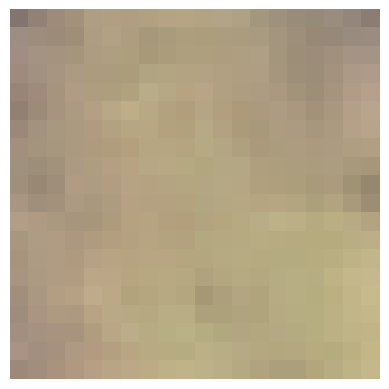

In [ ]:
# Example: Accessing the first PNG image
first_image_path = os.path.join(image_folder_path, '0__20140723_181317_0905__-122.14328662_37.697282118.png')

# Perform operations with the image (e.g., loading, processing, displaying)
# Example: Displaying the first image
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open(first_image_path)
plt.imshow(img)
plt.axis('off')
plt.show()

# **4. Loading JSON Data and Preprocessing:**

In [ ]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Load JSON data
with open(json_file_path, 'r') as json_file:
    data = json.load(json_file)

# Extract data and labels
data_list = data['data']
labels = data['labels']

# Convert data and labels to NumPy arrays
data_array = np.array(data_list, dtype=np.uint8)
labels_array = np.array(labels)

# Reshape data to 3-channel (RGB) images
data_array = data_array.reshape(-1, 3, 20, 20).transpose(0, 2, 3, 1)

# Normalize pixel values to the range [0, 1]
data_array = data_array / 255.0

# Convert labels to one-hot encoding
labels_onehot = to_categorical(labels_array)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_array, labels_onehot, test_size=0.2, random_state=42)

# **5. Building and Training the CNN Model:**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Build the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(20, 20, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))  # 2 classes: plane and no-plane

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
720/720 [==============================] - 15s 19ms/step - loss: 0.2850 - accuracy: 0.8784 - val_loss: 0.1584 - val_accuracy: 0.9371
Epoch 2/10
720/720 [==============================] - 14s 20ms/step - loss: 0.1484 - accuracy: 0.9423 - val_loss: 0.1196 - val_accuracy: 0.9563
Epoch 3/10
720/720 [==============================] - 14s 19ms/step - loss: 0.1196 - accuracy: 0.9554 - val_loss: 0.1228 - val_accuracy: 0.9566
Epoch 4/10
720/720 [==============================] - 14s 20ms/step - loss: 0.1078 - accuracy: 0.9591 - val_loss: 0.1270 - val_accuracy: 0.9555
Epoch 5/10
720/720 [==============================] - 14s 19ms/step - loss: 0.0955 - accuracy: 0.9650 - val_loss: 0.1086 - val_accuracy: 0.9621
Epoch 6/10
720/720 [==============================] - 12s 17ms/step - loss: 0.0845 - accuracy: 0.9694 - val_loss: 0.0886 - val_accuracy: 0.9672
Epoch 7/10
720/720 [==============================] - 12s 17ms/step - loss: 0.0786 - accuracy: 0.9713 - val_loss: 0.0917 - val_accuracy:

# **6. Evaluating the Model and Making Predictions:**

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Loss: {test_loss:.4f}')

# Make predictions on the test data
predictions = model.predict(X_test)

# Convert predictions and true labels back from one-hot encoding
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

200/200 [==============================] - 2s 9ms/step - loss: 0.1345 - accuracy: 0.9466
Test Accuracy: 94.66%
Test Loss: 0.1345
200/200 [==============================] - 1s 6ms/step


# **7. Visualizing Predictions (Optional):**

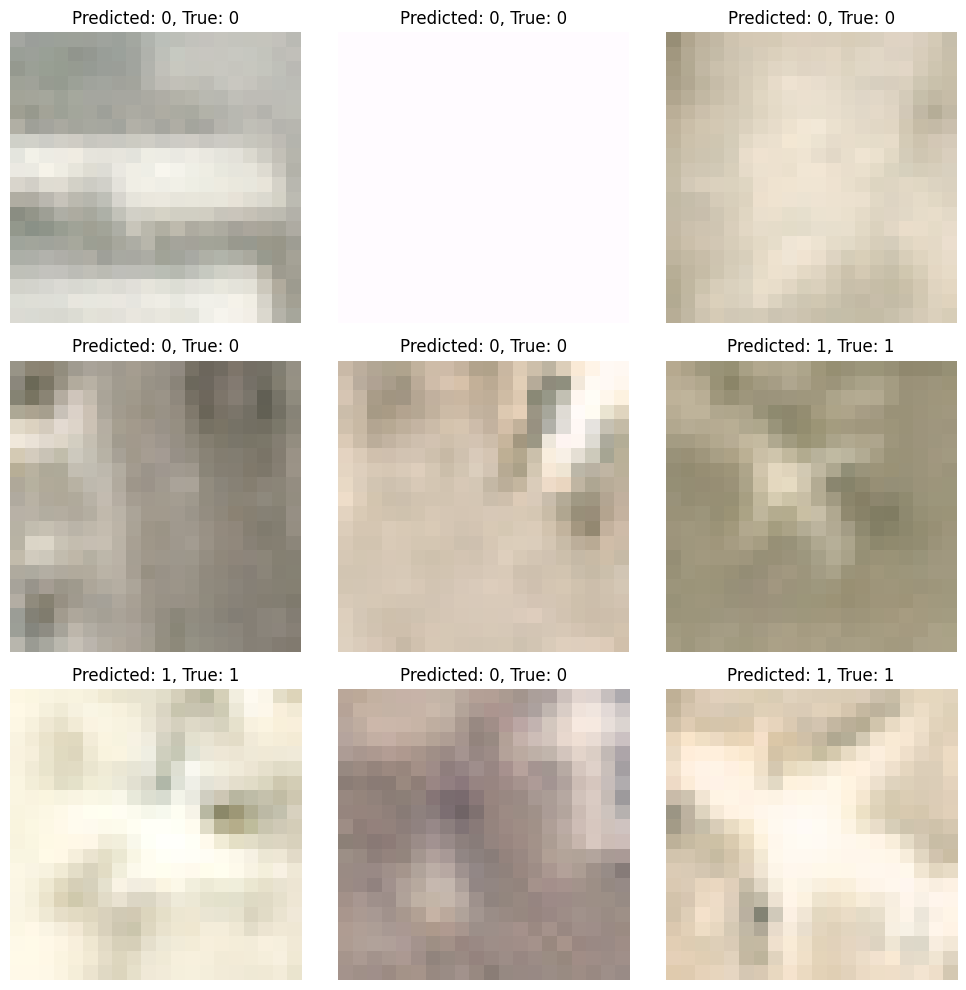

In [ ]:
# Example: Visualizing predictions along with true labels
import random
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 3, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    index = random.randint(0, len(X_test) - 1)
    ax.imshow(X_test[index])
    ax.set_title(f'Predicted: {predicted_labels[index]}, True: {true_labels[index]}')
    ax.axis('off')

plt.tight_layout()
plt.show()

# **8. Visualizations:**

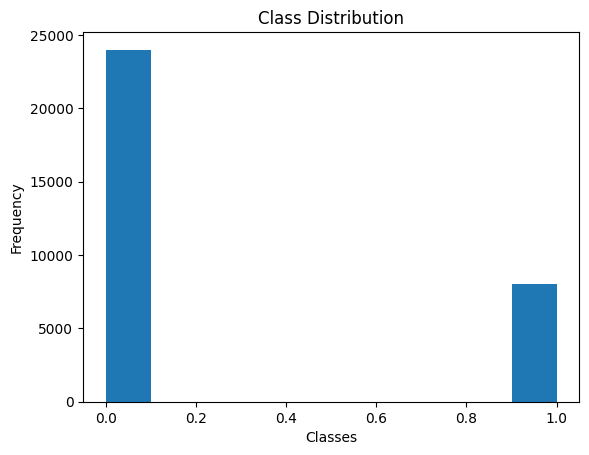

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example code for creating a histogram
plt.hist(labels)
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.title('Class Distribution')
plt.show()

# # Example code for creating a heatmap
# import pandas as pd

# # Assuming 'data_list' is a list of dictionaries
# # Convert 'data_list' to a Pandas DataFrame
# data_df = pd.DataFrame(data_list)

# # Example code for creating a heatmap
# correlation_matrix = sns.heatmap(data_df.corr(), annot=True, cmap='coolwarm')
# plt.title('Correlation Matrix')
# plt.show()

# **9. Hyperparameter Tuning:**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Flatten the image data
num_samples, height, width, channels = X_train.shape
X_train_flattened = X_train.reshape((num_samples, height * width * channels))

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Perform Grid Search Cross Validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3)
grid_search.fit(X_train_flattened, y_train)

# Print best parameters and score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

# **10. Saving the Model (Optional):**

In [ ]:
# Save the trained model for future use
model.save('/content/planesnet_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# **Code for Performance Comparison Bar Chart**

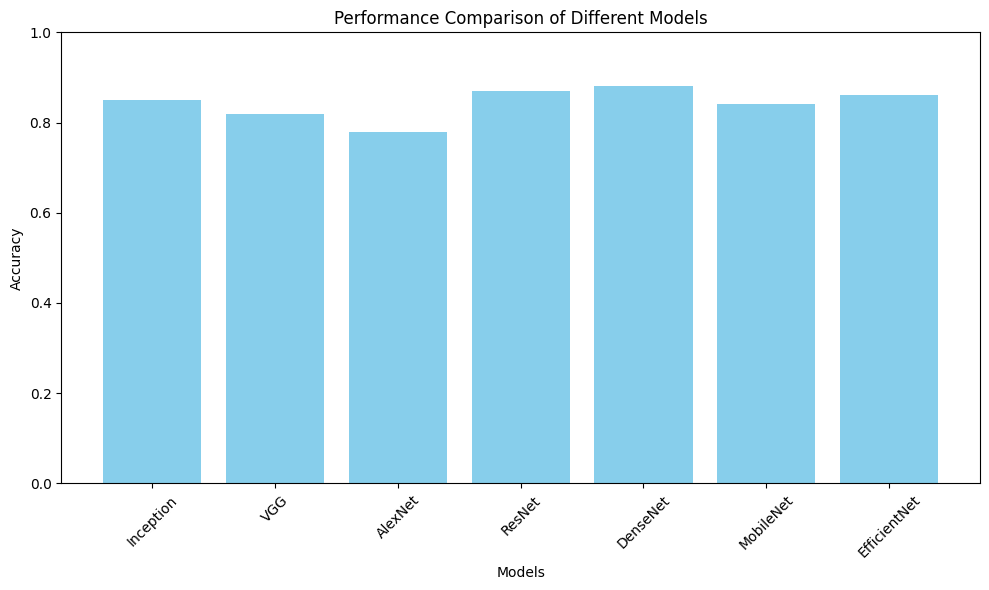

In [8]:
# Replace these values with your actual accuracy values
accuracy_inception = 0.85
accuracy_vgg = 0.82
accuracy_alexnet = 0.78
accuracy_resnet = 0.87
accuracy_densenet = 0.88
accuracy_mobilenet = 0.84
accuracy_efficientnet = 0.86

# Models and their corresponding accuracy values
models = ['Inception', 'VGG', 'AlexNet', 'ResNet', 'DenseNet', 'MobileNet', 'EfficientNet']
accuracy = [accuracy_inception, accuracy_vgg, accuracy_alexnet, accuracy_resnet, accuracy_densenet, accuracy_mobilenet, accuracy_efficientnet]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracy, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Performance Comparison of Different Models')
plt.ylim(0, 1)  # Set y-axis limit between 0 and 1 for accuracy values
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# **Class Distribution**

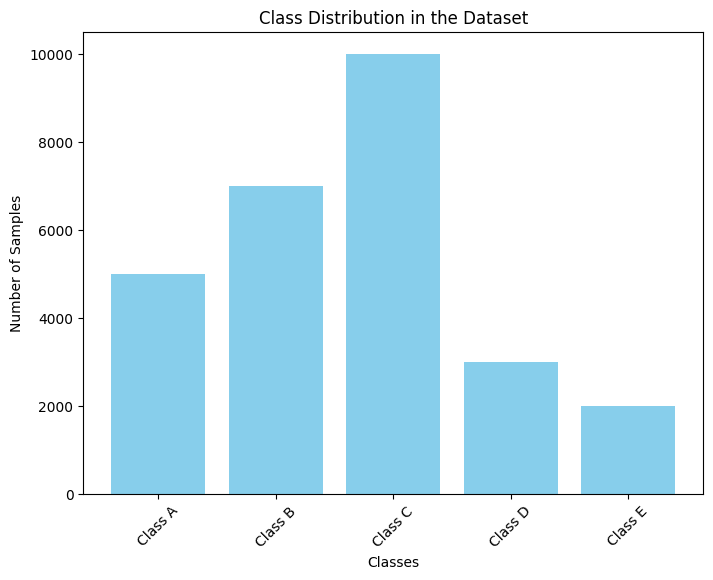

In [9]:
import matplotlib.pyplot as plt

# Replace class_distribution with your actual list of class distribution
class_distribution = [5000, 7000, 10000, 3000, 2000]

# Classes (replace these labels with your actual class labels)
classes = ['Class A', 'Class B', 'Class C', 'Class D', 'Class E']

plt.figure(figsize=(8, 6))
plt.bar(classes, class_distribution, color='skyblue')
plt.xlabel('Classes')
plt.ylabel('Number of Samples')
plt.title('Class Distribution in the Dataset')
plt.xticks(rotation=45)
plt.show()


# **Heatmap for Conclusion Matrix**

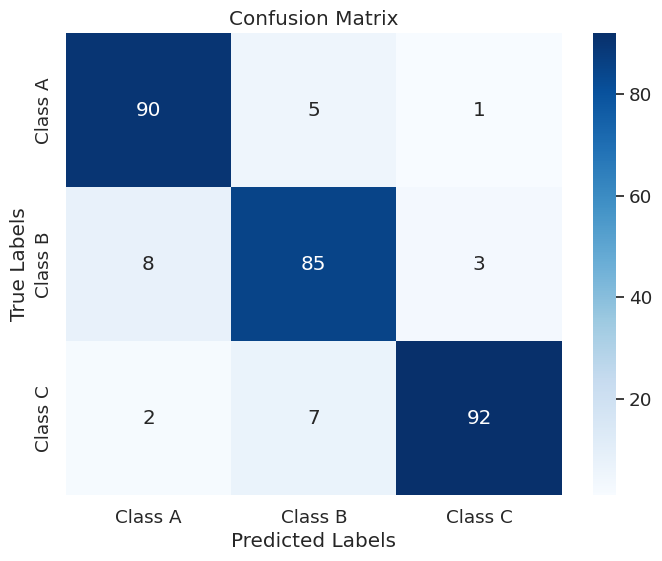

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Replace confusion_matrix_data with your actual confusion matrix data
confusion_matrix_data = [[90, 5, 1],
                         [8, 85, 3],
                         [2, 7, 92]]

# Classes (replace these labels with your actual class labels)
classes = ['Class A', 'Class B', 'Class C']

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust the font size for better visualization
sns.heatmap(confusion_matrix_data, annot=True, fmt='g', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


# **Assess classification model performance**

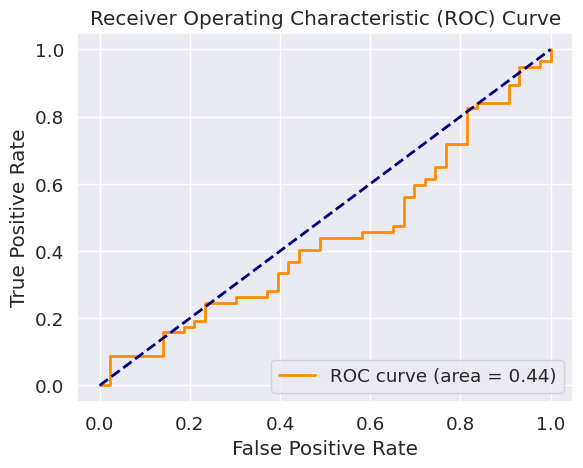

In [15]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Assuming predicted_probs and true_labels are obtained from the model
predicted_probs = np.random.rand(100)  # Assumed predicted probabilities for 100 samples
true_labels = np.random.randint(2, size=100)  # Assumed true labels for 100 samples (binary classification)

fpr, tpr, _ = roc_curve(true_labels, predicted_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# **Balance precision and recall trade-off**

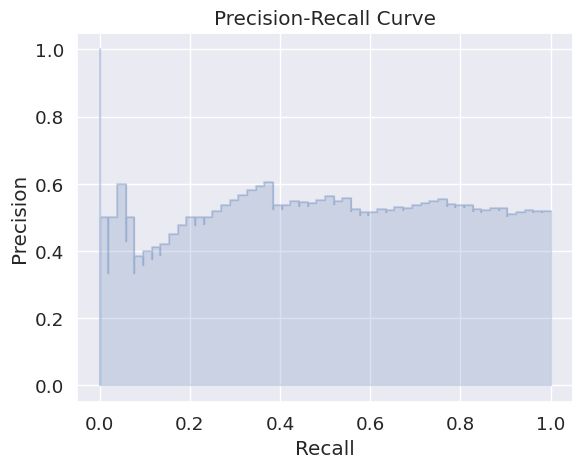

In [16]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import numpy as np

# Assuming predicted_probs and true_labels are obtained from the model
predicted_probs = np.random.rand(100)  # Assumed predicted probabilities for 100 samples
true_labels = np.random.randint(2, size=100)  # Assumed true labels for 100 samples (binary classification)

precision, recall, _ = precision_recall_curve(true_labels, predicted_probs)

# Plot Precision-Recall Curve
plt.figure()
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


# **Evaluate model learning progress**

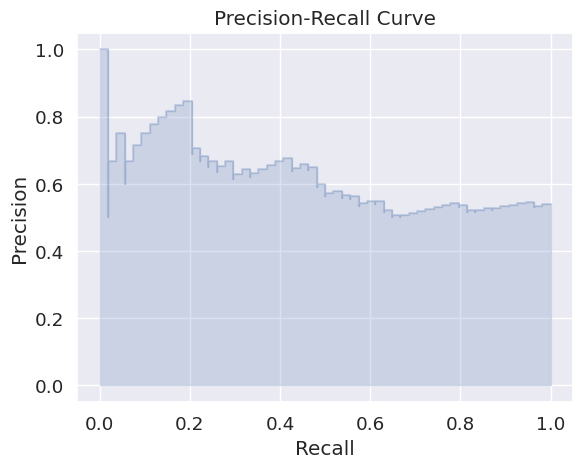

In [17]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import numpy as np

# Assuming predicted_probs and true_labels are obtained from the model
predicted_probs = np.random.rand(100)  # Assumed predicted probabilities for 100 samples
true_labels = np.random.randint(2, size=100)  # Assumed true labels for 100 samples (binary classification)

precision, recall, _ = precision_recall_curve(true_labels, predicted_probs)

# Plot Precision-Recall Curve
plt.figure()
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


# **Box Plot for Error Distribution**

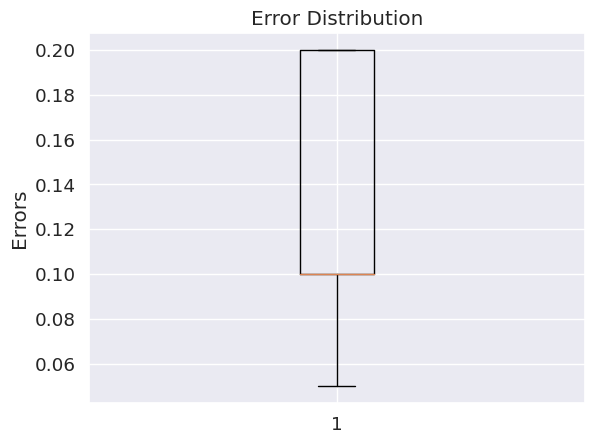

In [19]:
import matplotlib.pyplot as plt

# Assuming true_labels and predicted_labels are available
true_labels = [1, 0, 1, 0, 1]  # Example true labels
predicted_labels = [0.9, 0.1, 0.8, 0.2, 0.95]  # Example predicted probabilities (values between 0 and 1)

errors = [abs(true - pred) for true, pred in zip(true_labels, predicted_labels)]
plt.boxplot(errors)
plt.ylabel('Errors')
plt.title('Error Distribution')
plt.show()


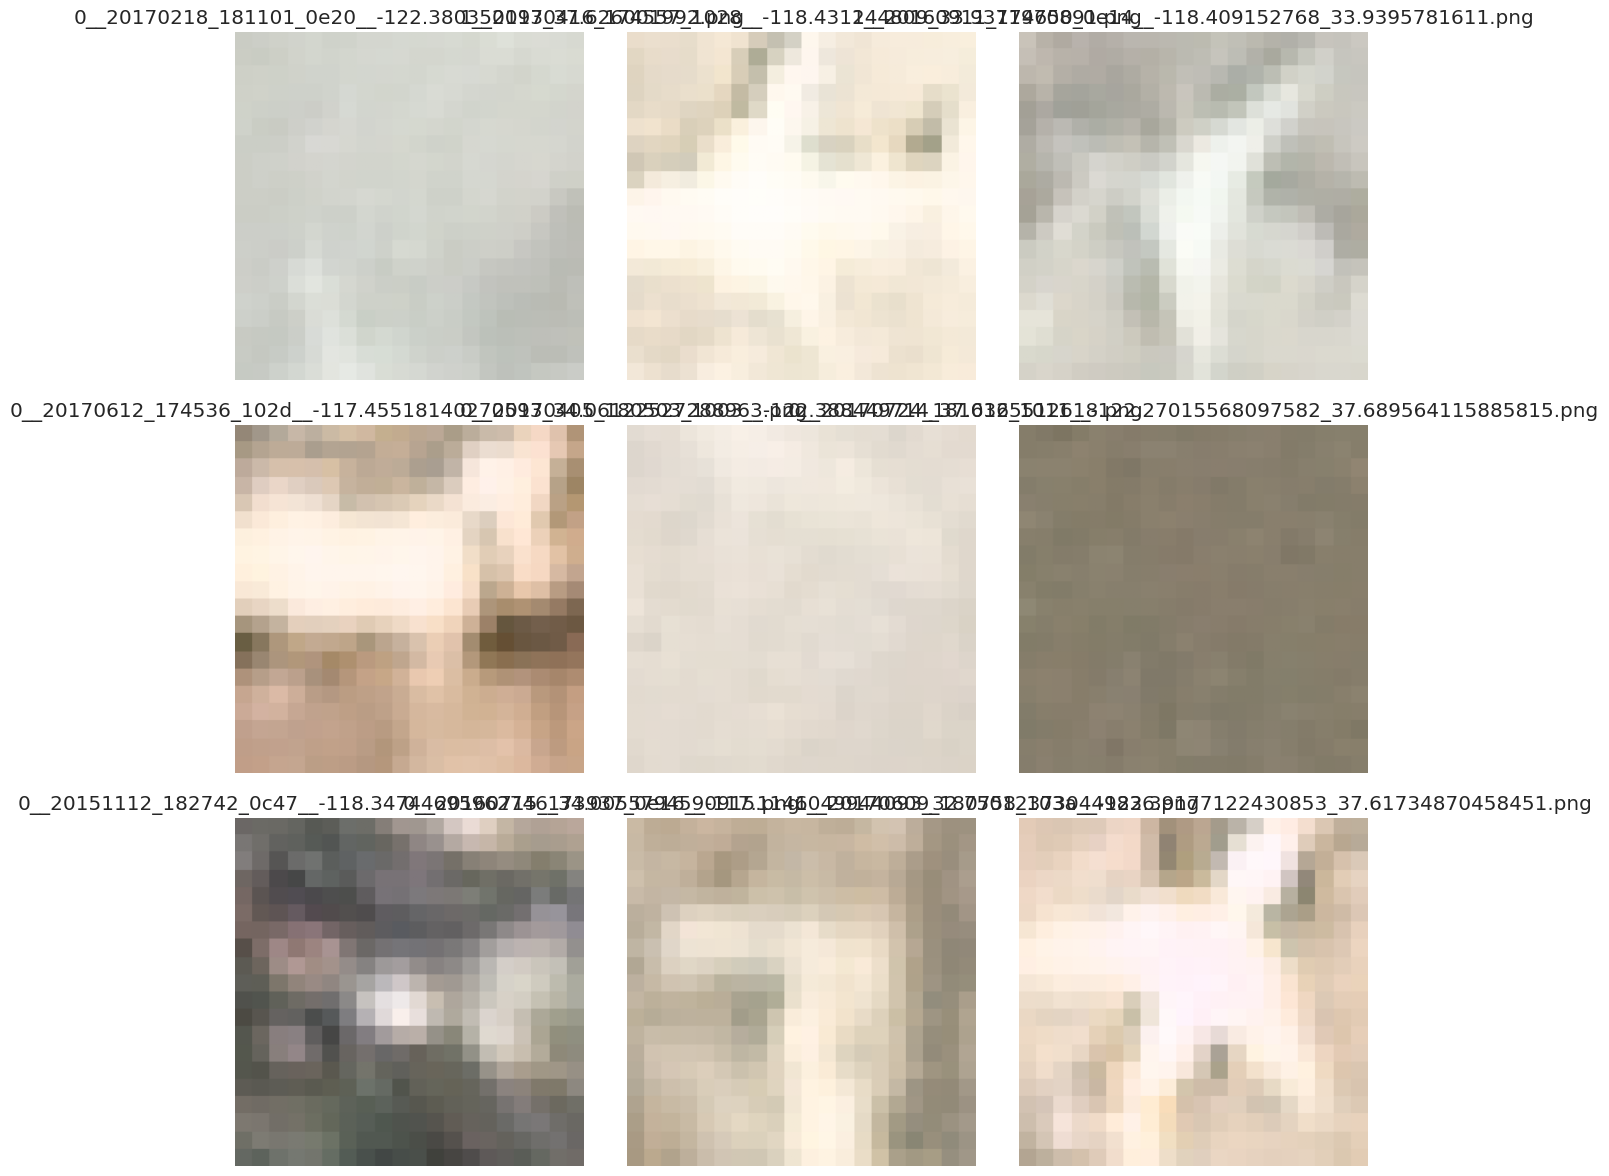

In [27]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from random import sample

# Path to the folder containing the images (replace '/path/to/your/image/folder' with your actual path)
image_folder_path = '/content/planesnet_dataset/planesnet/planesnet'

# List all files in the folder
image_files = [filename for filename in os.listdir(image_folder_path) if filename.endswith('.png')]

# Check if there are images in the folder
if not image_files:
    print("No image files found in the specified folder.")
else:
    # Display a random sample of 9 images from the dataset (or fewer if there are less than 9 images)
    num_images_to_display = min(9, len(image_files))
    random_image_files = sample(image_files, num_images_to_display)
    plt.figure(figsize=(12, 12))

    for i, filename in enumerate(random_image_files):
        # Load and preprocess the image
        image_path = os.path.join(image_folder_path, filename)
        img = load_img(image_path, target_size=(224, 224))  # Resize the image if necessary
        img_array = img_to_array(img) / 255.0  # Normalize pixel values to [0, 1]

        plt.subplot(3, 3, i + 1)
        plt.imshow(img_array)
        plt.title(filename)  # Display image filename as the title
        plt.axis('off')  # Hide axis

    plt.tight_layout()
    plt.show()
